In [2]:
import pandas as pd
import numpy as np

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [123]:
import matplotlib.pyplot as plt

In [18]:
# get markers
qtl_markers = '''1-56,1-171,2-99,2-113,3-35,3-74,4-11,4-23,4-36,4-70,5-1,5-10,5-34,6-30,7-4,7-21,9-4,11-9,11-21,13-7,14-12,15-6,15-16,16-11,27-6'''.split(',')
qtl_markers = ['mrk_'+'_'.join(i.split('-'))for i in qtl_markers]

In [5]:
crosspath = '../data/20210128_rqtl_cross.csv'

In [36]:
cross = pd.read_csv(crosspath, low_memory=False)
cross = cross.drop([0,1])
cross = cross.reset_index()
cross = cross.replace('AA', -1)
cross = cross.replace('AB', 0)
cross = cross.replace('BB', 1)
cross = cross.replace('-', np.nan)
cross.GENERATION = ['F'+str(i) for i in cross.GENERATION]
cross = cross.loc[cross.standardised_within_gen_BW8.isna()==False]
cross.standardised_within_gen_BW8 = cross.standardised_within_gen_BW8.astype(float)
cross.SEX = cross.SEX.astype(str)

cnew = []
for i in cross.columns:
    if '-' in i:
        ni = 'mrk_'+'_'.join(i.split('-'))
    else:
        ni = i
    cnew.append(ni)
        
        
cross.columns = cnew

In [37]:
cross_markers = [i for i in cross.columns if i.startswith('mrk')]

In [38]:
qtl_geno = cross[['standardised_within_gen_BW8', 'SEX']+qtl_markers]

In [55]:
lm_sex = smf.ols('standardised_within_gen_BW8 ~ SEX'.format(markers='+'.join(qtl_markers)), data=qtl_geno,)
lm_sexf = lm_sex.fit()

In [107]:
lm_joint= smf.ols('standardised_within_gen_BW8 ~ {markers}+SEX'.format(markers='+'.join(qtl_markers)), data=qtl_geno,)
lm_jointf = lm_joint.fit()

In [111]:
sexresid - np.var(lm_jointf.resid)

0.20776764926669622

In [112]:
0.20776764926669622/sexresid

0.2611975564512896

In [57]:
print(lm_sexf.summary())

                                 OLS Regression Results                                
Dep. Variable:     standardised_within_gen_BW8   R-squared:                       0.182
Model:                                     OLS   Adj. R-squared:                  0.182
Method:                          Least Squares   F-statistic:                     728.3
Date:                         Thu, 28 Jan 2021   Prob (F-statistic):          5.83e-145
Time:                                 15:03:37   Log-Likelihood:                -4260.5
No. Observations:                         3266   AIC:                             8525.
Df Residuals:                             3264   BIC:                             8537.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [63]:
#residual variance after fitting sex on the gen-standardised pheno
sexresid = np.var(lm_sexf.resid)

In [70]:
lmf.df_resid

2681.0

In [73]:
resid_var = []
for i in qtl_markers:
    lm = smf.ols('standardised_within_gen_BW8 ~ {marker} + SEX'.format(marker=i), data=qtl_geno,)
    lmf = lm.fit()
    print(np.var(lmf.resid))
    print(lmf.df_resid)

    print(sexresid - np.var(lmf.resid))
    resid_var.append([i,np.var(lmf.resid)])

0.8009431007731378
2842.0
-0.0055005549488528205
0.7671373300315335
2825.0
0.02830521579275147
0.7826373238851998
2931.0
0.012805221939085176
0.7950906519810844
2973.0
0.00035189384320055694
0.7935843898133099
2677.0
0.001858156010975054
0.7942541566029186
2978.0
0.001188389221366326
0.7792676830109916
2587.0
0.01617486281329339
0.7878120065959406
3031.0
0.007630539228344335
0.7847451673500451
3068.0
0.010697378474239905
0.7909606546181766
2769.0
0.004481891206108424
0.7928085999933545
2966.0
0.002633945830930462
0.7878236303170592
2649.0
0.007618915507225821
0.7880764044487206
2946.0
0.00736614137556435
0.7828445472093066
2647.0
0.012597998614978345
0.792978288149044
2838.0
0.002464257675240944
0.7834057481121414
2790.0
0.01203679771214361
0.7827852287759943
2620.0
0.01265731704829065
0.7933301326291393
2764.0
0.002112413195145657
0.7835254379775953
2742.0
0.011917107846689645
0.7918620274212522
2958.0
0.003580518403032751
0.7926297261503652
2733.0
0.0028128196739197753
0.797612346377

In [76]:
rv = pd.DataFrame(resid_var)

In [78]:
rv.columns = ['qtlmrk', 'qtlmrk_sex_resid']

In [79]:
rv['mrk_explained_resid'] = sexresid-rv['qtlmrk_sex_resid']

In [81]:
rv['mrk_explained_resid_frac'] = rv['mrk_explained_resid']/sexresid

In [84]:
rv['mrk_explained_resid_perc'] = (rv['mrk_explained_resid']/sexresid)*100

In [91]:
rv.sum(axis=0)

qtlmrk                      mrk_1_56mrk_1_171mrk_2_99mrk_2_113mrk_3_35mrk_...
qtlmrk_sex_resid                                                      19.7106
mrk_explained_resid                                                  0.175469
mrk_explained_resid_frac                                             0.220593
mrk_explained_resid_perc                                              22.0593
dtype: object

In [100]:
rvtot = ['TOTAL', np.nan,0.175469,0.220593,22.0593 ]

In [102]:
rv = rv.T

In [103]:
rv[26] = rvtot

In [104]:
rv = rv.T

In [105]:
rv

,qtlmrk,qtlmrk_sex_resid,mrk_explained_resid,mrk_explained_resid_frac,mrk_explained_resid_perc
0,mrk_1_56,0.800943,-0.00550055,-0.00691509,-0.691509
1,mrk_1_171,0.767137,0.0283052,0.0355842,3.55842
2,mrk_2_99,0.782637,0.0128052,0.0160982,1.60982
3,mrk_2_113,0.795091,0.000351894,0.000442388,0.0442388
4,mrk_3_35,0.793584,0.00185816,0.002336,0.2336
5,mrk_3_74,0.794254,0.00118839,0.001494,0.1494
6,mrk_4_11,0.779268,0.0161749,0.0203344,2.03344
7,mrk_4_23,0.787812,0.00763054,0.00959282,0.959282
8,mrk_4_36,0.784745,0.0106974,0.0134483,1.34483
9,mrk_4_70,0.790961,0.00448189,0.00563446,0.563446


In [83]:
rv['mrk_explained_resid_frac'].sum()

0.22059312969466316

In [51]:
np.var(qtl_geno.standardised_within_gen_BW8)

0.9729195835351839

In [54]:
1-np.var(lmf.resid)

0.41232510344241124

In [47]:
0.20455745417571503 / 0.9729195835351839

0.21025114268174

In [113]:
#funny business with QTLs on Chr1 and Chr15

In [156]:
resid_var2 = []
for i in qtl_markers:
    lm2 = smf.ols('standardised_within_gen_BW8 ~  mrk_1_56 + {marker} + SEX'.format(marker=i), data=qtl_geno,)
    lm = smf.ols('standardised_within_gen_BW8 ~  {marker} + SEX'.format(marker=i), data=qtl_geno,)

    lmf = lm.fit()
    lmf2 = lm2.fit()

    #print(np.var(lmf.resid))
    #print(lmf.df_resid)

    print(np.var(lmf2.resid)-np.var(lmf.resid) )
    resid_var2.append([i,np.var(lmf2.resid)-np.var(lmf.resid)])

0.0
0.0004385694401645157
0.007150517306088511
0.012973386144088273
0.011982363151921027
0.0033559029703849053
0.0026793185587249413
0.006762470736540238
0.008602487691576344
0.008232542412956234
0.005842394473869583
0.005360151177685624
0.01014797173058346
0.005012450733672513
0.010465503771958207
0.005449201102884826
0.009968663864852956
0.00892845762266603
0.01027842288599845
0.0104503669199143
0.007522401947353652
0.003997858377034924
0.007022566527647545
0.005350879645862561
0.005506347998045835


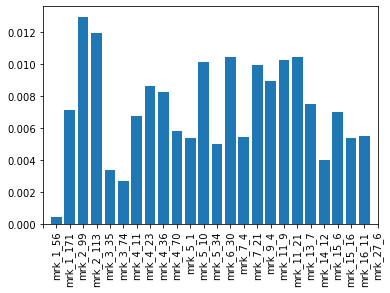

In [157]:
fig, ax = plt.subplots(ncols=1, nrows=1)

ax.bar(x=range(len(resid_var2)), height=pd.DataFrame(resid_var2)[1])
ax.set_xticks(range(len(resid_var2)+1))
ax.set_xticklabels(['']+list(pd.DataFrame(resid_var2)[0]), rotation=90,)
ax.set_xlim(0, len(resid_var2))
ax.set_ylim(0,)
plt.show()

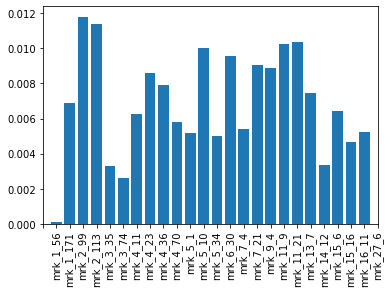

In [154]:
fig, ax = plt.subplots(ncols=1, nrows=1)

ax.bar(x=range(len(resid_var2)), height=pd.DataFrame(resid_var2)[1])
ax.set_xticks(range(len(resid_var2)+1))
ax.set_xticklabels(['']+list(pd.DataFrame(resid_var2)[0]), rotation=90,)
ax.set_xlim(0, len(resid_var2))
ax.set_ylim(0,)
plt.show()

In [152]:
resid_var2

[['mrk_1_56', 0.0],
 ['mrk_1_171', 0.0004385694401645157],
 ['mrk_2_99', 0.007150517306088511],
 ['mrk_2_113', 0.012973386144088273],
 ['mrk_3_35', 0.011982363151921027],
 ['mrk_3_74', 0.0033559029703849053],
 ['mrk_4_11', 0.0026793185587249413],
 ['mrk_4_23', 0.006762470736540238],
 ['mrk_4_36', 0.008602487691576344],
 ['mrk_4_70', 0.008232542412956234],
 ['mrk_5_1', 0.005842394473869583],
 ['mrk_5_10', 0.005360151177685624],
 ['mrk_5_34', 0.01014797173058346],
 ['mrk_6_30', 0.005012450733672513],
 ['mrk_7_4', 0.010465503771958207],
 ['mrk_7_21', 0.005449201102884826],
 ['mrk_9_4', 0.009968663864852956],
 ['mrk_11_9', 0.00892845762266603],
 ['mrk_11_21', 0.01027842288599845],
 ['mrk_13_7', 0.0104503669199143],
 ['mrk_14_12', 0.007522401947353652],
 ['mrk_15_6', 0.003997858377034924],
 ['mrk_15_16', 0.007022566527647545],
 ['mrk_16_11', 0.005350879645862561],
 ['mrk_27_6', 0.005506347998045835]]

In [168]:
lmsex= smf.ols(' mrk_1_56 ~ SEX'.format(marker=i), data=qtl_geno,)


In [163]:
lmsex= smf.ols(' standardised_within_gen_BW8 ~ mrk_1_171 + SEX'.format(marker=i), data=qtl_geno,)


In [169]:
lmsexf = lmsex.fit()

In [170]:
lmsexf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mrk_1_56   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4360
Date:                Thu, 28 Jan 2021   Prob (F-statistic):              0.509
Time:                        17:15:09   Log-Likelihood:                -3032.0
No. Observations:                2845   AIC:                             6068.
Df Residuals:                    2843   BIC:                             6080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0134      0.019      0.700      0.484      -0.024       0.051
SEX[T.2]      -0.0174      0.026     -0.660      0.509      -0.069       0.034
==============================================================================
Omnibus:                      553.584   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.308
Skew:                          -0.008   Prob(JB):                     4.10e-25
Kurtosis:                       2.027   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm._sexf.

In [171]:
import seaborn as sns

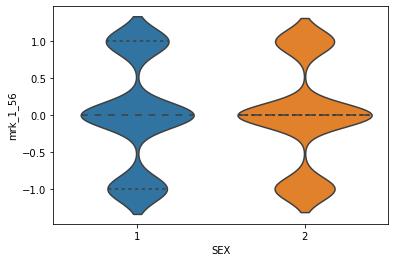

In [190]:
sns.violinplot(y='mrk_1_56',x='SEX', data=qtl_geno, orient='vertical', inner='quartiles')
plt.show()

In [201]:
print(np.sum(qtl_geno.loc[qtl_geno.mrk_1_56==0]['SEX']=='1'))
print(np.sum(qtl_geno.loc[qtl_geno.mrk_1_56==0]['SEX']=='2'))

643
798


In [202]:
print(np.sum(qtl_geno.loc[qtl_geno.mrk_1_56==1]['SEX']=='1'))
print(np.sum(qtl_geno.loc[qtl_geno.mrk_1_56==1]['SEX']=='2'))

357
351


In [205]:
hom_het_f = 798/(351+357)
hom_het_m = 643/(357+339)

In [210]:
hom_het_f
hom_het_m

0.9238505747126436

In [208]:
print(np.mean(qtl_geno.loc[qtl_geno.SEX=='1']['mrk_1_56']))

0.01344286781179985


In [209]:
print(np.mean(qtl_geno.loc[qtl_geno.SEX=='2']['mrk_1_56']))

-0.00398406374501992


In [212]:
hom_het_m

0.9238505747126436

In [203]:
print(np.sum(qtl_geno.loc[qtl_geno.mrk_1_56==-1]['SEX']=='1'))
print(np.sum(qtl_geno.loc[qtl_geno.mrk_1_56==-1]['SEX']=='2'))

339
357


In [181]:
np.sum(qtl_geno.mrk_1_56==1)

708

In [183]:
np.sum(qtl_geno.mrk_1_56==-1)

696